# Explore here

In [2]:
# Your code here
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

archivo = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

df_original = pd.read_csv(archivo)
df=pd.read_csv(archivo)

# Obtener las dimensiones
datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()
# Obtener información sobre tipos de datos y valores no nulos
df.info()



Contamos con 48895 cantidad de datos y 16 atributos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 n

- Contamos con un total de 48.895 filas (alojamientos a alquilar) y 16 columnas, distintos atributos de los departamentos.
- Tanto la variable last_review como la variable reviews_per_month tienen más de 10000 valores nulos.
- Las variables name y host_name también cuentan con valores nulos, pero más reducido que lo anterior.
- El resto de las variables cuentan con todos los valores.
- Los datos cuentan con 10 características numéricas y 6 características categóricas.

In [3]:
#Búsqueda y eliminación de duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()


# sin considerar el id
df.drop("id", axis = 1).duplicated().sum()

np.int64(0)

No se han registrado datos duplicados en nuestro DataSet.

## **Objetivo:** 
### Predecir el valor de alquiler de un nuevo alojamiento.

### Selección de atributos relevantes:

Vamos a eliminar los siguientes atributos:
- id, name, host_id, host_name: Por ser algo individual.
- last_review, reviews_per_month: Por tener varios datos nulos y no ser relevante para nuestro análisis (un nuevo alojamiento no tendrá reviews).

In [4]:
# Selección de atributos relevantes
df_filtrado=df
df_filtrado.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)

df_filtrado.head()



,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Análisis univariante

In [5]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


Tenemos 3 variables categóricas:
- neighbourhood_group
- neighbourhood
- room_type

In [6]:
df_filtrado.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [7]:
df_filtrado.neighbourhood.value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [8]:
df_filtrado.room_type.value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

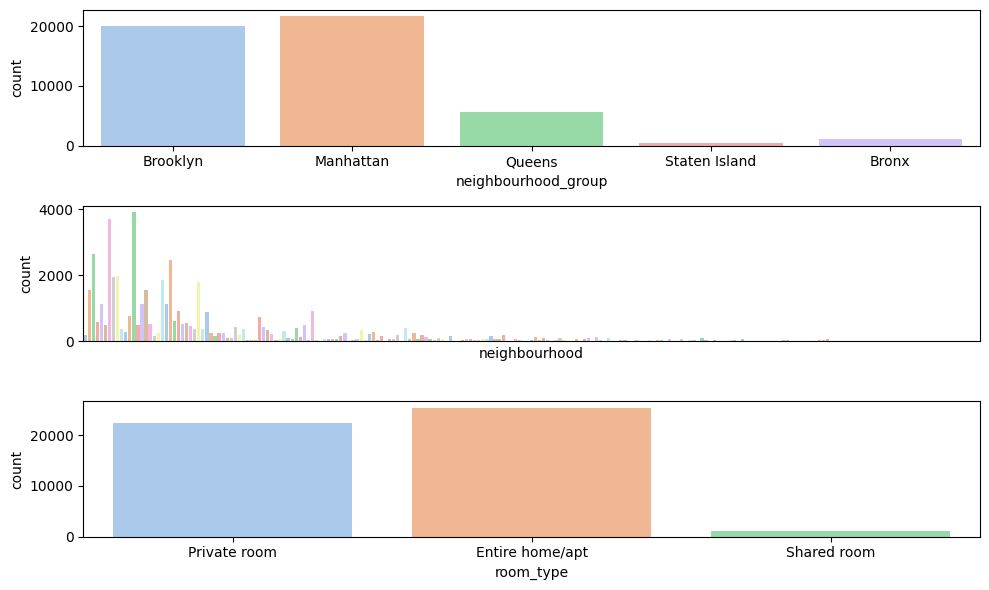

In [13]:
fig, axis = plt.subplots(3, 1, figsize = (10, 6))

sns.countplot(ax = axis[0], data = df_filtrado, x = "neighbourhood_group", palette='pastel', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[1], data = df_filtrado, x = "neighbourhood", palette='pastel', hue= "neighbourhood", legend=False).set_xticks([])
sns.countplot(ax = axis[2], data = df_filtrado, x = "room_type", palette='pastel', hue= "room_type", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Con la representación de cada variable podemos determinar que:
- neighbourhood_group: La mayoría de los alojamientos se sitúan entre Brooklyn y Manhattan; alrededor de un 15% se sitúa en Queens y un muy pequeño porcentaje se sitúa en Bronx y Staten Island.
- neighbourhood: Está dividido en 221 barrios, de los cuales Williamsburg y Bedford-Stuyvesant cuentan con casi 4.000 propiedades; Harlem y Bushwick alrededor de 2.500 propiedades y casi el 90% de los barrios cuentan con menos de 500 propiedades (500 prop equivale aproximadamente al 1% del total del dataset).
- room_type: La mayoría de los alojamientos son casas o apartamentos enteros y habitaciones privadas, mientras que un bajo porcentaje es de habitaciones compartidas.

Tenemos 7 variables numéricas:
- latitude
- longitude 
- price 
- minimum_nights 
- number_of_reviews 
- calculated_host_listings_count 
- availability_365


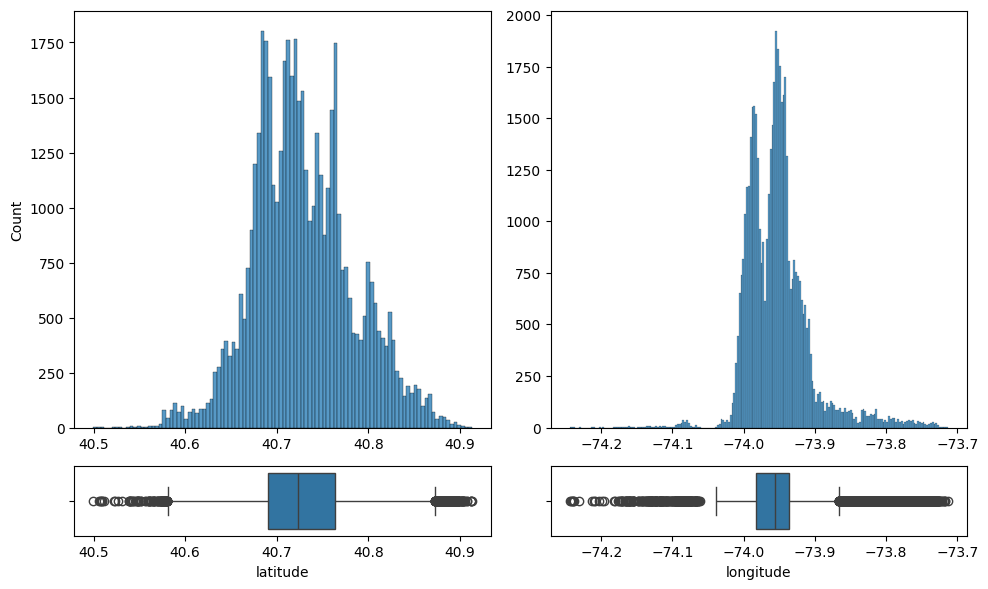

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_filtrado, x = "latitude").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_filtrado, x = "latitude")

sns.histplot(ax = axis[0, 1], data = df_filtrado, x = "longitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_filtrado, x = "longitude")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos observar que la mayoría de las propiedades de sitúan alrededor de la latitud 40.75 y la longitud -73.95.

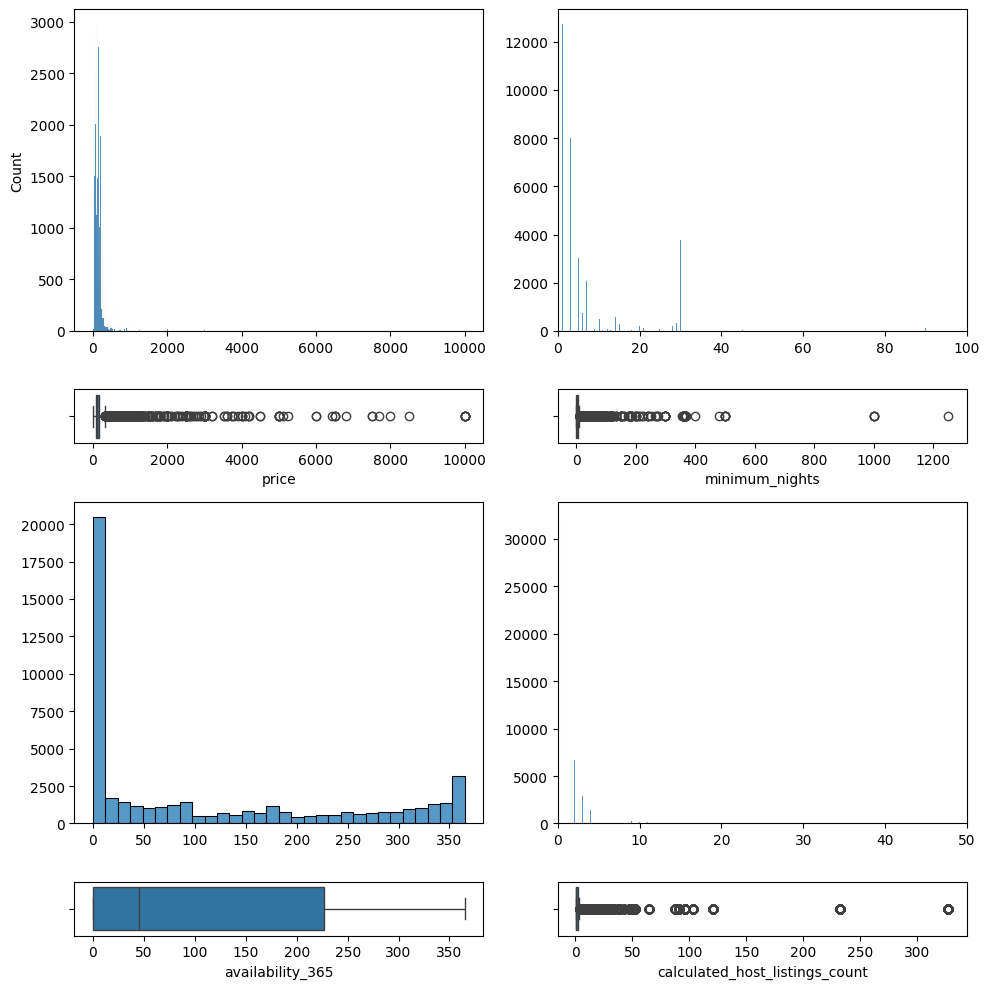

In [23]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_filtrado, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_filtrado, x = "price")

sns.histplot(ax = axis[0, 1], data = df_filtrado, x = "minimum_nights").set(xlabel = None, ylabel = None, xlim=(0,100))
sns.boxplot(ax = axis[1, 1], data = df_filtrado, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df_filtrado, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df_filtrado, x = "availability_365")

sns.histplot(ax = axis[2, 1], data = df_filtrado, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None, xlim=(0,50))
sns.boxplot(ax = axis[3, 1], data = df_filtrado, x = "calculated_host_listings_count")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Podemos observar que todas las variables tienen valores atípicos. 